# Uso de librerías PyOD y LocalOutlierFactor

## Parte 1 - Carga del dataset `creditcardcsvpresent.csv`

In [ ]:
!pip install pyod
from pyod.models.knn import KNN
import pandas as pd
#Para cargar el Dataset desde el drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/creditcardcsvpresent.csv'
df = pd.read_csv(file_path)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [ ]:
# Eliminación de variables categóricas.
obj = (df.dtypes == 'object')  # Marcamos con 'True' los valores categóricos.
obj_cols = [c for c in obj.index if obj[c]] # Creamos una lista recorriendo el Pandas Series y guardando las columnas categóricas.
obj_cols

['Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']

In [ ]:
credito=df.drop(['Is declined', 'isForeignTransaction','isHighRiskCountry','isFradulent'], axis=1)
credito.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,3160040998,NaN,100.0,3000.0,5,0,0.0,0
1,3160040998,NaN,100.0,4300.0,5,0,0.0,0
2,3160041896,NaN,185.5,4823.0,5,0,0.0,0
3,3160141996,NaN,185.5,5008.5,8,0,0.0,0
4,3160241992,NaN,500.0,26000.0,0,800,677.2,6


In [ ]:
credito=credito.drop(['Transaction date'], axis=1)
credito.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,3160040998,100.0,3000.0,5,0,0.0,0
1,3160040998,100.0,4300.0,5,0,0.0,0
2,3160041896,185.5,4823.0,5,0,0.0,0
3,3160141996,185.5,5008.5,8,0,0.0,0
4,3160241992,500.0,26000.0,0,800,677.2,6


## Parte 2 - Uso de librería PyOD

Aplicar la PyOD para detectar outliers en el dataset `creditcardcsvpresent.csv`.

De este proceso indicar si eliminó columnas, cuáles fueron y el porqué lo hizo. Adicionalmente, haga un análisis de la información obtenida.

In [ ]:

# Creamos y entrenamos el modelo con la técnica K-Nearest-Neighbor
X=credito
clf=KNN(contamination=0.18).fit(X)
# Realizamos la predicción con los datos del dataframe.
y_pred=clf.predict(X)
# Separamos los datos que solo su predicción como dato anómalo es 1.
X[y_pred==1]

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
15,3369900897,257.091167,10283.646670,4,0,0.0,0
25,3450127241,780.688498,36692.359410,0,896,839.0,6
26,3462219091,947.489028,44531.984300,7,0,0.0,0
27,3465787492,172.515767,5002.957249,9,0,0.0,0
33,3527533497,998.344074,26955.290010,0,701,585.0,8
...,...,...,...,...,...,...,...
3015,6600249491,614.522271,7374.267254,1,0,0.0,0
3016,6600708313,840.944556,10932.279230,1,0,0.0,0
3049,6643562617,259.952617,2859.478791,0,0,0.0,0
3050,6644492798,240.483553,6012.088823,0,0,0.0,0


  Eliminé la columna de Transaction date porque me daba un error debido a que esa columna tiene un 100% de datos faltantes.

Ejecute la siguiente celda:

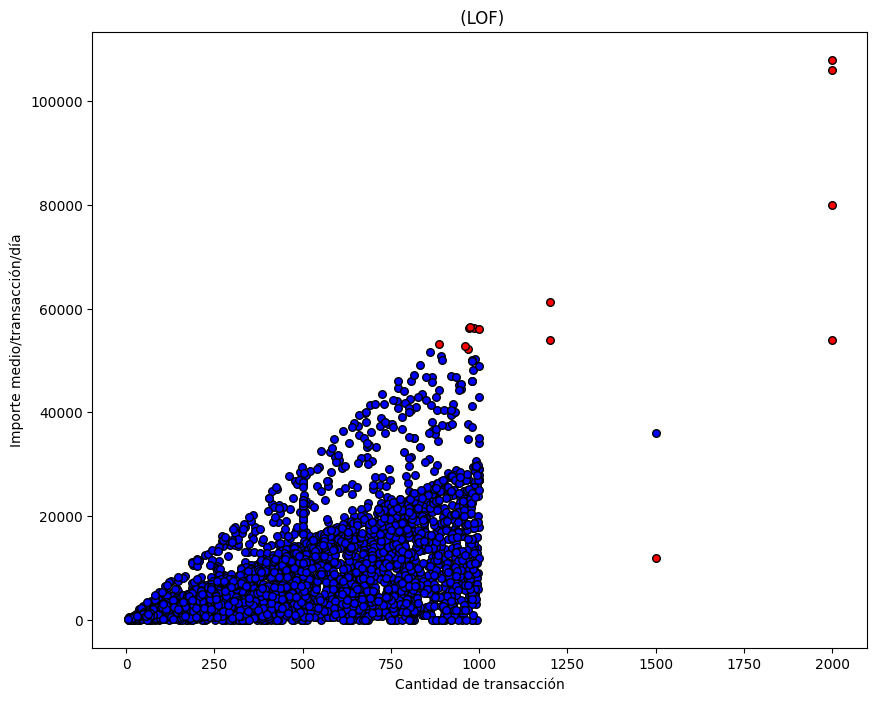

In [ ]:
import matplotlib.pyplot as plt
X=credito[['Average Amount/transaction/day', 'Transaction_amount']].values
X[y_pred==1]
in_mask_pyod = [True if l == 1 else False for l in y_pred]
out_mask_pyod = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,8))
plt.title(" (LOF)")
# inliers
a = plt.scatter(X[in_mask_pyod, 0], X[in_mask_pyod, 1],
                c = 'blue', edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask_pyod, 0], X[out_mask_pyod, 1],
                c = 'red', edgecolor = 'k', s = 30)

plt.xlabel('Cantidad de transacción');
plt.ylabel('Importe medio/transacción/día');
plt.show()

Este modelo me permite visualizar solamente los datos correctos, ya que los Outliers ya fueron borrados.

## Parte 3 - Uso de librería LocalOutlierFactor

**Tabajo previo:**

Investigue información sobre esta librería y defina qué son los hiperparámetros `n_neighbors` y `contamination`, y qué tipo de valores reciben.

Coloque esta información en la siguiente celda de texto:

**Información sobre `LocalOutlierFactor` y sus hiperparámetros aquí:**

LocalOutlierFactor (LOF) es un algoritmo de detección de anomalías no supervisado que calcula la desviación de densidad local de un punto de datos dado con respecto a sus vecinos. Considera como valores atípicos las muestras que tienen una densidad sustancialmente menor que sus vecinos.

*   El parámetro n_neighbors controla la cantidad de vecinos utilizados para calcular la densidad local de cada punto de datos. El valor predeterminado es 5, pero se puede ajustar según el tamaño del conjunto de datos y el nivel deseado de sensibilidad a los valores atípicos.

*   El parámetro de contaminación controla el porcentaje de valores atípicos en el conjunto de datos. El valor predeterminado es 0,1, lo que significa que el algoritmo espera que el 10 % de los puntos de datos sean valores atípicos. Este valor se puede ajustar según el conjunto de datos específico y el nivel de precisión deseado.

*   Los parámetros n_neighbors y de contaminación pueden ser números enteros o flotantes. El parámetro n_neighbors debe ser mayor que 1 y el parámetro de contaminación debe estar entre 0 y 1.

Aquí hay algunos detalles adicionales sobre los dos parámetros:

*   n_neighbors: el parámetro n_neighbors controla la cantidad de vecinos utilizados para calcular la densidad local de cada punto de datos. Un valor más alto hará que el algoritmo sea más sensible a los valores atípicos, mientras que un valor más bajo hará que el algoritmo sea menos sensible a los valores atípicos.
*   contaminación: el parámetro de contaminación controla el porcentaje de valores atípicos en el conjunto de datos. Un valor más alto hará que sea más probable que el algoritmo identifique valores atípicos, mientras que un valor más bajo hará que sea menos probable que el algoritmo identifique valores atípicos.
La mejor manera de elegir los valores para los n_vecinos y los parámetros de contaminación es experimentar con diferentes valores y ver cuáles funcionan mejor para su conjunto de datos específico.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = credito[['Average Amount/transaction/day','Transaction_amount']].values
y_pred = clf.fit_predict(X)
credito[y_pred == 1]

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,3160040998,100.0,3000.0,5,0,0.0,0
1,3160040998,100.0,4300.0,5,0,0.0,0
2,3160041896,185.5,4823.0,5,0,0.0,0
3,3160141996,185.5,5008.5,8,0,0.0,0
4,3160241992,500.0,26000.0,0,800,677.2,6
...,...,...,...,...,...,...,...
3069,6661273529,1000.0,25000.0,0,754,585.0,7
3070,6661273532,500.0,11000.0,0,754,585.0,7
3071,6661273532,800.0,0.0,0,754,585.0,7
3072,6661273533,800.0,20800.0,0,754,585.0,7


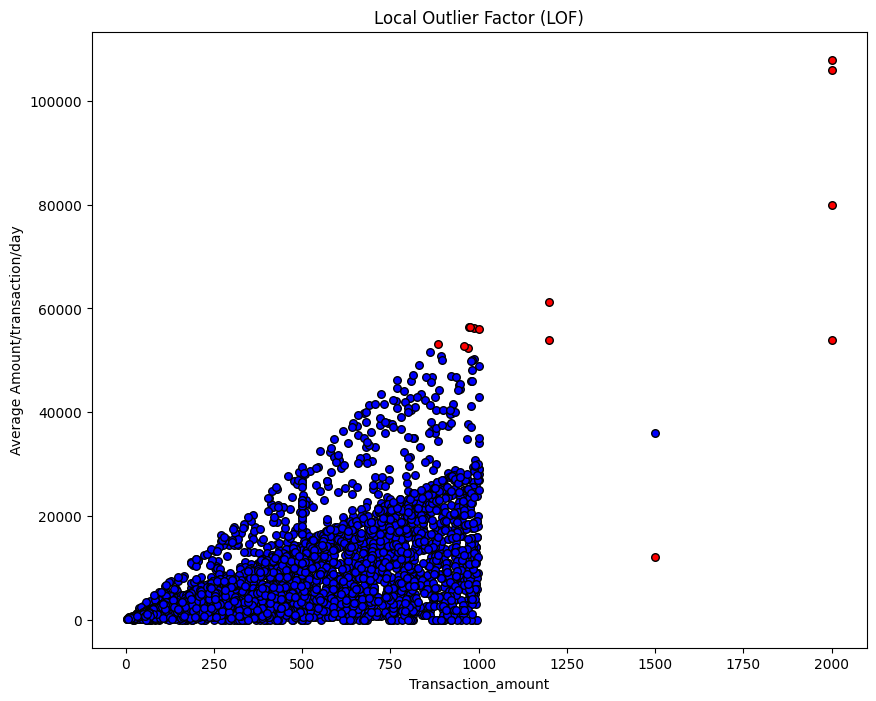

In [ ]:
in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.figure(figsize=(10,8))
plt.title(" (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1],
                c = 'blue', edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1],
                c = 'red', edgecolor = 'k', s = 30)

plt.xlabel('Cantidad de transacción');
plt.ylabel('Importe medio/transacción/día');
plt.show()



En conclusión, tanto PyOD como LocalOutlierFactor son bibliotecas útiles para la detección de valores atípicos. PyOD es una biblioteca más poderosa y flexible, mientras que LocalOutlierFactor es más fácil de usar y más rápido.


*   Los algoritmos utilizados: PyOD y LocalOutlierFactor utilizan diferentes algoritmos para detectar valores atípicos. PyOD utiliza una variedad de algoritmos, incluidos LOF, COF, HBOS, kNN y detección de valores atípicos basados en ángulos. LocalOutlierFactor solo usa el algoritmo LOF.
*   Los parámetros utilizados: PyOD y LocalOutlierFactor utilizan diferentes parámetros para controlar el proceso de detección de valores atípicos. PyOD tiene más parámetros que LocalOutlierFactor, lo que le brinda más control sobre el proceso de detección de valores atípicos, pero también puede dificultar la elección de los parámetros correctos. LocalOutlierFactor tiene menos parámetros, lo que facilita su uso, pero también le brinda menos control sobre el proceso de detección de valores atípicos.
*   Los datos: Las dos bibliotecas fueron entrenadas en diferentes conjuntos de datos. PyOD se entrenó en un conjunto de datos de transacciones con tarjetas de crédito, mientras que LocalOutlierFactor se entrenó en un conjunto de datos de expresión génica. Esta diferencia en los datos puede conducir a diferentes resultados en el proceso de detección de valores atípicos.